feature scaling is two type:
standarization and normalization

standarization is also known as Z-score normalization
formula=  (xi-mean)/standard variance

after standarization : mean=0 and standard variance is 1

apply:= k_mean, knn, pca, artifical neural network, gradient descent

it does not effect outlier and decision tree algrorithm 

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
df=pd.read_csv('k_mean_cluster_data.csv')
df.head()

,Age,Income,insurance
0,27,70000,0
1,29,90000,0
2,29,61000,1
3,28,60000,0
4,42,150000,1


In [5]:
x=df.iloc[:,:2]
x

,Age,Income
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000
5,39,155000
6,41,160000
7,38,156000
8,36,130000
9,35,137000


In [6]:
y=df.iloc[:,2:]
y

,insurance
0,0
1,0
2,1
3,0
4,1
5,1
6,0
7,1
8,1
9,1


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

x_train.shape, x_test.shape

((17, 2), (5, 2))

# standard scaler

In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
# fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train)

# transform train and test sets
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [10]:
scaler.mean_
# array[0] is mean of age and array[1] is mean of income

array([3.54117647e+01, 9.31176471e+04])

In [14]:
scaler.var_
# variance of age and income

array([3.34186851e+01, 1.75680969e+09])

In [16]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_train_scaled, columns=x_test.columns)

In [17]:
x_train_scaled

,Age,Income
0,0.620706,-1.004851
1,-1.628082,-1.076426
2,0.620706,-0.265247
3,0.101755,0.879946
4,0.966674,1.595692
5,0.793690,-0.718553
6,1.139658,1.357110
7,-1.109131,-0.766269
8,0.620706,1.476401
9,0.966674,-0.694695


In [18]:
x.describe()

,Age,Income
count,22.000000,22.000000
mean,34.818182,85363.636364
std,5.901060,41206.270275
min,26.000000,45000.000000
25%,29.000000,54250.000000
50%,36.500000,64500.000000
75%,39.750000,120000.000000
max,43.000000,160000.000000


In [19]:
x_train_scaled.describe()

,Age,Income
count,1.700000e+01,1.700000e+01
mean,-3.526591e-16,1.306145e-16
std,1.030776e+00,1.030776e+00
min,-1.628082e+00,-1.076426e+00
25%,-1.109131e+00,-7.662692e-01
50%,4.477227e-01,-5.515454e-01
75%,7.936902e-01,1.046954e+00
max,1.312641e+00,1.595692e+00


In [20]:
import numpy as np

In [21]:
np.round(x.describe(),1)

,Age,Income
count,22.0,22.0
mean,34.8,85363.6
std,5.9,41206.3
min,26.0,45000.0
25%,29.0,54250.0
50%,36.5,64500.0
75%,39.8,120000.0
max,43.0,160000.0


In [22]:
np.round(x_train_scaled.describe(),1)

,Age,Income
count,17.0,17.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.6,-1.1
25%,-1.1,-0.8
50%,0.4,-0.6
75%,0.8,1.0
max,1.3,1.6


# manual Standardization
(xi-mean)/std_var

In [25]:
age_mean=df['Age'].mean()
age_mean

34.81818181818182

In [31]:
age_var=df['Age'].std()
age_var

5.901060143949631

In [36]:
age=[]

for i in df['Age']:
    age.append(float("{:.2f}".format((i-age_mean)/age_var)))

age
    

[-1.32,
 -0.99,
 -0.99,
 -1.16,
 1.22,
 0.71,
 1.05,
 0.54,
 0.2,
 0.03,
 0.37,
 -1.49,
 -1.32,
 -1.16,
 -0.99,
 -0.48,
 0.88,
 1.05,
 1.39,
 0.71,
 1.05,
 0.71]

In [37]:
income_mean=df['Income'].mean()
income_var=df['Income'].std()
income=[]
for i in df['Income']:
    income.append(float("{:.2f}".format((i-income_mean)/income_var)))
income

[-0.37,
 0.11,
 -0.59,
 -0.62,
 1.57,
 1.69,
 1.81,
 1.71,
 1.08,
 1.25,
 -0.98,
 -0.91,
 -0.83,
 -0.88,
 -0.79,
 -0.49,
 -0.54,
 -0.52,
 -0.13,
 -0.08,
 -0.66,
 -0.83]

In [39]:
new_df=pd.DataFrame({'age':age, 'income':income})
new_df

,age,income
0,-1.32,-0.37
1,-0.99,0.11
2,-0.99,-0.59
3,-1.16,-0.62
4,1.22,1.57
5,0.71,1.69
6,1.05,1.81
7,0.54,1.71
8,0.20,1.08
9,0.03,1.25


In [43]:
np.round(new_df['age'].describe(),1)

count    22.0
mean      0.0
std       1.0
min      -1.5
25%      -1.0
50%       0.3
75%       0.8
max       1.4
Name: age, dtype: float64

In [44]:
np.round(new_df['income'].describe(),1)

count    22.0
mean      0.0
std       1.0
min      -1.0
25%      -0.8
50%      -0.5
75%       0.8
max       1.8
Name: income, dtype: float64

# Effect of Scaling

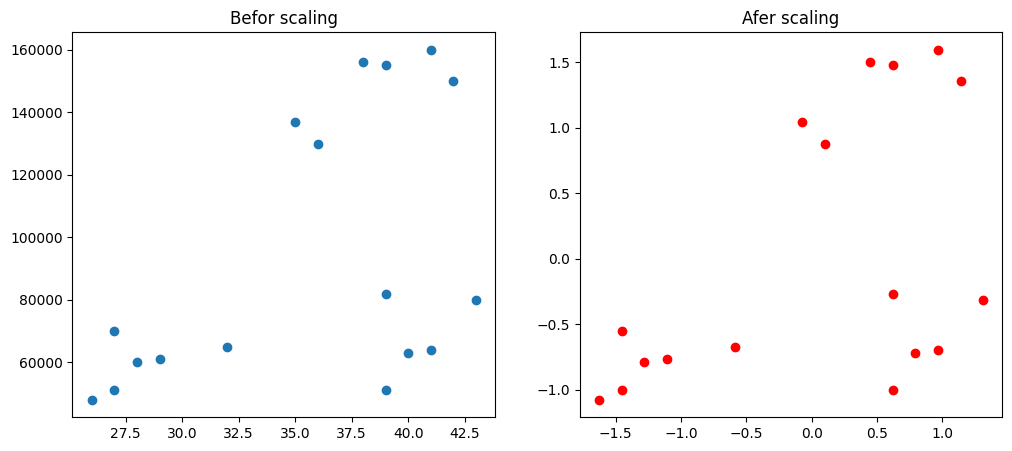

In [48]:
import matplotlib.pyplot as plt
fig,(ax1, ax2)=plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(x_train['Age'], x_train['Income'])
ax1.set_title('Befor scaling')
ax2.scatter(x_train_scaled['Age'], x_train_scaled['Income'], color='red')
ax2.set_title('Afer scaling')
plt.show()

After and befor scaling no change accor in data but only mean is 0 and std_var is 1

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

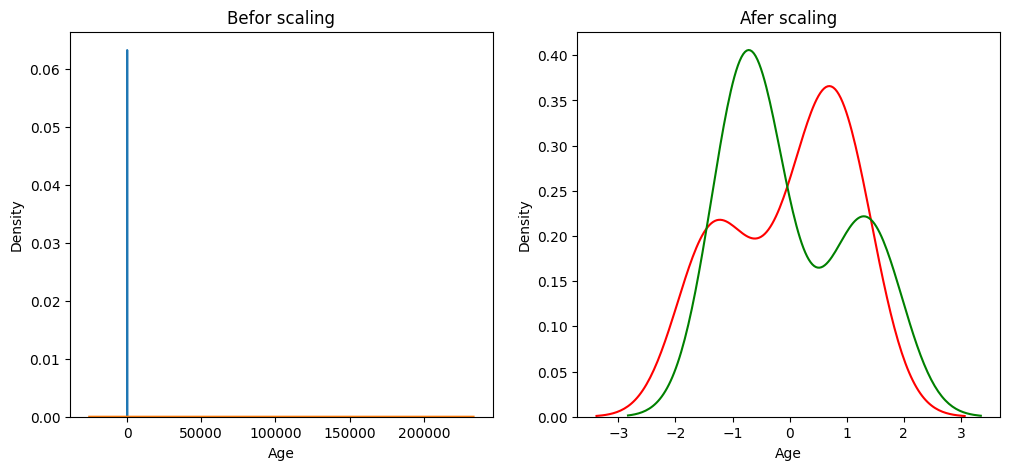

In [50]:
fig,(ax1, ax2)=plt.subplots(ncols=2, figsize=(12,5))
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['Income'],ax=ax1)
ax1.set_title('Befor scaling')

sns.kdeplot(x_train_scaled['Age'], ax=ax2,color='red')
sns.kdeplot(x_train_scaled['Income'],ax=ax2,color='green')
ax2.set_title('Afer scaling')
plt.show()